# Analisa Sentimen Dari Media Sosial Twitter Tentang Agresivitas Kepada Para Pejabat Indonesia Di Tahun 2016

## 1. Import Library & Load Dataset Dari Local Device

In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data_2016 = pd.read_excel("Data Tahun 2016.xlsx")
data_2016.tail()

,tanggal,content,label
690,2016-11-27 12:47:34+00:00,@kompascom yg nda diundang Jokowi &amp; Antasa...,positif
691,2016-11-27 12:29:23+00:00,@anggit1ar @jokowi @republikaonline ini sih pu...,positif
692,2016-11-27 11:55:23+00:00,@republikaonline ini beneran bodoh atau pura2 ...,positif
693,2016-11-27 00:50:43+00:00,ga ada koneksi internet pak? apa masa bodoh de...,negatif
694,2016-11-26 22:05:02+00:00,pengibaran bendera RRC efek dr jokowi buka pel...,negatif


In [3]:
# Mengecek tipe data dan juga apakah di dalam data memiliki nilai NaN/tidak
data_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tanggal  695 non-null    object
 1   content  695 non-null    object
 2   label    695 non-null    object
dtypes: object(3)
memory usage: 16.4+ KB


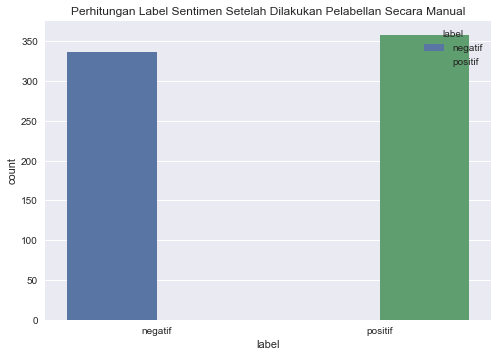

<Figure size 720x720 with 0 Axes>

In [4]:
# Melakukan visualisasi untuk kolom "Sentimen"

plt.style.use("seaborn")
plt.title("Perhitungan Label Sentimen Setelah Dilakukan Pelabellan Secara Manual")
sns.countplot(x="label", hue="label", data=data_2016)
plt.figure(figsize=(10, 10))
plt.show()

In [5]:
# Menghitung sekaligus mengurutkan jumlah label terbanyak berdasarkan tweet
jmlh_tweet = data_2016.groupby("label").count()["content"].reset_index().sort_values(by="content", ascending=False)
jmlh_tweet.style.background_gradient(cmap="winter")

,label,content
1,positif,358
0,negatif,337


Dapat dilihat dari perhitungan diatas, dari 695 jumlah data netizen twitter ketika melakukan tweet tentang topik para pejabat di Indonesia mendapatkan label positif yang sangat tinggi daripada label negatif yang memiliki jumlah sentimen sebanyak 358 tweet sedangkan label negatif memiliki jumlah sentimen sebanyak 337. Bisa dikatakan jumlah label sentimen memiliki nilai yang cukup balanced (seimbang).

## 2. Text Processing (Cleansing, Case Folding, Tokenizing, Stopwords & Stemming)

In [6]:
# Menghilangkan tweet dan username dari kalimat-kalimat, simbol-simbol, emoticon yang tidak dibutuhkan selama pengujian
def bersih_text(text):
    text = re.sub(r'[^a-zA-z0-9]',' ', str(text))
    text = re.sub(r'\b\w{1,2}\b','', text)
    text = re.sub(r'\s\s+',' ', text)
    text = re.sub(r'https?:\/\/\S+', '', text)  
    text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text)
    return text

data_2016["content"] = data_2016["content"].apply(bersih_text)

data_2016.head()

,tanggal,content,label
0,2016-12-21 04:36:51+00:00,jakartans bego mending kalo anies ini agus htt...,negatif
1,2016-12-19 19:20:46+00:00,kaskus Apa Anies itu dipikir bego ahok Jauh l...,positif
2,2016-12-09 11:21:17+00:00,Mau debatnya klo bertempat Petamburan kali klo...,negatif
3,2016-11-24 21:22:09+00:00,BEGO bngt ASU Anies Sandi Uno itu pantes aja d...,positif
4,2016-11-18 17:40:30+00:00,sam arif kalo orang tidak bego dan tidak tol...,negatif


In [7]:
# Menghapus spasi pada kolom "label"
data_2016.label = list(map(lambda x: x.strip(), data_2016.label))
data_2016.head()

,tanggal,content,label
0,2016-12-21 04:36:51+00:00,jakartans bego mending kalo anies ini agus htt...,negatif
1,2016-12-19 19:20:46+00:00,kaskus Apa Anies itu dipikir bego ahok Jauh l...,positif
2,2016-12-09 11:21:17+00:00,Mau debatnya klo bertempat Petamburan kali klo...,negatif
3,2016-11-24 21:22:09+00:00,BEGO bngt ASU Anies Sandi Uno itu pantes aja d...,positif
4,2016-11-18 17:40:30+00:00,sam arif kalo orang tidak bego dan tidak tol...,negatif


Setelah melakukan proses cleansing teks yaitu menghapus beberapa simbol/karakter-karakter yang tidak dipentingkan dalam kolom content tweet, langkah selanjutnya adalah case folding. Case folding merupakan sebuah tahapan untuk mengubah huruf-huruf kapital menjadi huruf-huruf kecil

### Case Folding

In [8]:
# Mengubah ukuran setiap kalimat yang ada di kolom "content" menjadi huruf kecil
data_2016["content"] = data_2016["content"].str.lower()

data_2016.head()

,tanggal,content,label
0,2016-12-21 04:36:51+00:00,jakartans bego mending kalo anies ini agus htt...,negatif
1,2016-12-19 19:20:46+00:00,kaskus apa anies itu dipikir bego ahok jauh l...,positif
2,2016-12-09 11:21:17+00:00,mau debatnya klo bertempat petamburan kali klo...,negatif
3,2016-11-24 21:22:09+00:00,bego bngt asu anies sandi uno itu pantes aja d...,positif
4,2016-11-18 17:40:30+00:00,sam arif kalo orang tidak bego dan tidak tol...,negatif


Setelah melakukan proses case folding, langkah selanjutnya adalah tokenizing/tokenisasi. Tahap tokenizing merupakan tahap pemotongan teks ke dalam satuan kata.

### Tokenizing

In [9]:
# Melakukan Tahapan Tokenisasi. 
# Tokenisasi adalah tahapan prepocessing data yang digunakan untuk membagi kalimat menjadi perkata
def tokennization(text):
    return word_tokenize(text)

data_2016["content_tokenizing"] = data_2016["content"].apply(tokennization)
data_2016.head()

,tanggal,content,label,content_tokenizing
0,2016-12-21 04:36:51+00:00,jakartans bego mending kalo anies ini agus htt...,negatif,"[jakartans, bego, mending, kalo, anies, ini, a..."
1,2016-12-19 19:20:46+00:00,kaskus apa anies itu dipikir bego ahok jauh l...,positif,"[kaskus, apa, anies, itu, dipikir, bego, ahok,..."
2,2016-12-09 11:21:17+00:00,mau debatnya klo bertempat petamburan kali klo...,negatif,"[mau, debatnya, klo, bertempat, petamburan, ka..."
3,2016-11-24 21:22:09+00:00,bego bngt asu anies sandi uno itu pantes aja d...,positif,"[bego, bngt, asu, anies, sandi, uno, itu, pant..."
4,2016-11-18 17:40:30+00:00,sam arif kalo orang tidak bego dan tidak tol...,negatif,"[sam, arif, kalo, orang, tidak, bego, dan, tid..."


Setelah melakukan tahapan tokenisasi, selanjutnya saya akan melakukan proses filtering (stowords). Proses stopwords ini merupakan tahapan mengambil kata-kata dari tahapan tokenisasi. Stopword merupakan sebuah tahapan yang dimana bertujuan untuk membuang kata-kata yang tidak deskriptif dalam melakukan pendekatan bag-of-words.

### Stopwords

In [10]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

Proses stopwords saya lakukan dengan mengambil nilai-nilai yang ada diatas yang sudah ditentukan oleh library Sastrawi. Kata-kata diatas boleh digunakan secara keseluruhan/diambil hanya beberapa saja.

In [11]:
# Proses Filtering dari kolom "Tweet_Tokenizing"
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

list_delete = ["yang", "untuk", "pada", "ke", "antara", "dua", "ia", "seperti", "antara", "dia", "seperti", "jika",
               "tidak", "oleh", "saat", "harus", "sementara", "mereka", "sudah", "terhadap", "sehingga",
               "secara", "agar", "lain", "begitu", "mengapa", "kenapa", "yaitu", "yakni", "daripada",
               "sekitar", "serta", "di", "dari", "telah", "sebagai", "masih", 'setidaknya', "sesuatu", "pasti", 
               "saja", "toh", "ya", "walau", "hal", "bahwa", "atau", "hanya", "ada", "mereka", "agar", "lain", 
               "anda", "begitu", "yaitu", "yakni", "itulah", "demi", "dimana", "pula", "sambil", "sebelum", 
               "sesudah", "guna", "ia", "dengan", "https", "supaya", "kah", "pun", "sampai", 
               "sedangkan", "selagi", "seharusnya", "sebetulnya", "setiap"]

list_stopwords = stopwords.words("indonesian")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Mendeklarasikan fungsi untuk list_stopwords
def stopword(text):
    return [word for word in text if word not in list_stopwords]

data_2016["content_stopwords"] = data_2016["content_tokenizing"].apply(stopword)

In [13]:
# Mendeklarasikan fungsi untuk list_delete
def stopwords_removal(text):
    return [word for word in text if word not in list_delete]

data_2016["content_stopwords"] = data_2016["content_stopwords"].apply(stopwords_removal)
data_2016.head()

,tanggal,content,label,content_tokenizing,content_stopwords
0,2016-12-21 04:36:51+00:00,jakartans bego mending kalo anies ini agus htt...,negatif,"[jakartans, bego, mending, kalo, anies, ini, a...","[jakartans, bego, mending, kalo, anies, agus, ..."
1,2016-12-19 19:20:46+00:00,kaskus apa anies itu dipikir bego ahok jauh l...,positif,"[kaskus, apa, anies, itu, dipikir, bego, ahok,...","[kaskus, anies, dipikir, bego, ahok, loe, hok]"
2,2016-12-09 11:21:17+00:00,mau debatnya klo bertempat petamburan kali klo...,negatif,"[mau, debatnya, klo, bertempat, petamburan, ka...","[debatnya, klo, bertempat, petamburan, kali, k..."
3,2016-11-24 21:22:09+00:00,bego bngt asu anies sandi uno itu pantes aja d...,positif,"[bego, bngt, asu, anies, sandi, uno, itu, pant...","[bego, bngt, asu, anies, sandi, uno, pantes, a..."
4,2016-11-18 17:40:30+00:00,sam arif kalo orang tidak bego dan tidak tol...,negatif,"[sam, arif, kalo, orang, tidak, bego, dan, tid...","[sam, arif, kalo, orang, bego, tolol, milih, a..."


Tahapan terakhir dalam text mining adalah proses stemming. Teknik Stemming merupakan sebuah tahapan kegiatan text preprocessing untuk memperkecil jumlah indeks yang berbeda dari suatu data dan juga untuk melakukan pengelompokan kata-kata lain yang memiliki kata dasar dan arti yang serupa namun memiliki bentuk yang berbeda karena mendapatkan imbuhan yang berbeda pula.

### Stemming

In [14]:
# Proses Stemming dibantu dengan bantuan swifter
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter # Swifter berfungsi untuk mempercepat froses stemming pada Dataframe dengan menjalankan task secara parallel

# Membuat Stemmer dari sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Membuat fungsi stemming
def stemming(text):
    return stemmer.stem(text)

term_dict = {}

# Menghitung ada berapa kata/words di dalam kolom "content_stopwords"
for document in data_2016["content_stopwords"]:
    for text in document:
        if text not in term_dict:
            term_dict[text] = " "
            
print(len(term_dict))
print("------------------------")

# Menampilkan isi kata/words yang telah dilakukan proses stemming
for text in term_dict:
    term_dict[text] = stemming(text)
    print(text,":" ,term_dict[text])
    
print(term_dict)
print("------------------------")

# Membuat fungsi baru untuk proses stemming
def stemming_word(document):
    return [term_dict[text] for text in document]

data_2016["content_stemming"] = data_2016["content_stopwords"].swifter.apply(stemming_word)

3236
------------------------
jakartans : jakartans
bego : bego
mending : mending
kalo : kalo
anies : anies
agus : agus
c66jtx7qoz : c66jtx7qoz
kaskus : kaskus
dipikir : pikir
ahok : ahok
loe : loe
hok : hok
debatnya : debat
klo : klo
bertempat : tempat
petamburan : tambur
kali : kali
kalah : kalah
debat : debat
kasih : kasih
kode : kode
teriak2 : teriak2
cemen : cemen
hebat : hebat
swlwyu8q4c : swlwyu8q4c
bngt : bngt
asu : asu
sandi : sandi
uno : uno
pantes : pantes
aja : aja
dipecat : pecat
jkw : jkw
proyek2 : proyek2
foke : foke
proyek : proyek
kkn : kkn
pnbj7r1mjk : pnbj7r1mjk
sam : sam
arif : arif
orang : orang
tolol : tolol
milih : milih
ahy : ahy
percetakanku : cetak
iwanfals : iwanfals
polling : polling
menang : menang
iwan : iwan
fals : fals
dibilang : bilang
pendukung : dukung
dipiara : piara
masukan : masuk
dana : dana
csr : csr
apbd : apbd
anis : anis
swasta : swasta
rngsupzbaj : rngsupzbaj
imanhermawan23 : imanhermawan23
marcel : marcel
prawira : prawira
herilatief : heril

pemilih : pilih
parah : parah
pakai : pakai
dtsjgdocq6 : dtsjgdocq6
merdekadotcom : merdekadotcom
dasar : dasar
ketinggalan : tinggal
tiru2 : tiru2
langkah : langkah
mega : mega
bner2 : bner2
tukang : tukang
copy : copy
doang : doang
tbayupatti : tbayupatti
kencing : kencing
lurus : lurus
bekas : bekas
pect : pect
otaknya : otak
ed : ed
tirta : tirta
yudh4sampurna : yudh4sampurna
tonywibowo12 : tonywibowo12
zulemo15 : zulemo15
donywenas : donywenas
mlmkabeh : mlmkabeh
fariz1234 : fariz1234
wewenang : wewenang
ektp : ektp
iih : iih
rinjanijb : rinjanijb
pedukung : dukung
wis : wis
wedan : wedan
koplak : koplak
amrik : amrik
fitnah : fitnah
waljamaah : waljamaah
jonru : jonru
fadlizon : fadlizon
fahrihamzah : fahrihamzah
dpp : dpp
halus24 : halus24
ratnaspaet : ratnaspaet
fahiraidris : fahiraidris
gerindra : gerindra
history : history
diatas : atas
rhomaihrama : rhomaihrama
ngibul : ngibul
uda : uda
mimik : mimik
susu : susu
trs : trs
bobo : bobo
gih : gih
bambang34640775 : bambang346407

bully : bully
the : the
president : president
because : because
there : there
case : case
hysteris : hysteris
anggota : anggota
dpdri : dpdri
nekat : nekat
merencanakan : rencana
aksimakaralawakilrakyat411 : aksimakaralawakilrakyat411
jngn : jngn
agma : agma
cra2 : cra2
kotor : kotor
lbh : lbh
barokah : barokah
sosmed : sosmed
kuliah : kuliah
ecek : ecek
pas : pas
gagu : gagu
gagap : gagap
ngopijahe : ngopijahe
09 : 09
habibrizieq : habibrizieq
sendok : sendok
almaidah : almaidah
8xllaxga2g : 8xllaxga2g
radioelshinta : radioelshinta
temuan : temu
inteljen : inteljen
rahasia : rahasia
indonesia : indonesia
estiningsihdwi : estiningsihdwi
demokrasi : demokrasi
omongan : omong
ditelan : tel
mujib170472 : mujib170472
ditemui : temu
wapres : wapres
konstitusi : konstitusi
hrsnya : hrsnya
sindotrijayafm : sindotrijayafm
kmi : kmi
bayaran : bayar
suap : suap
kampungan : kampung
tvonenewsdotcom : tvonenewsdotcom
jagan : jagan
radikal : radikal
kurs : kurs
070 : 070
hhh : hhh
nambah : nambah
su

golovkinnn : golovkinnn
senang : senang
komunis : komunis
ngmng : ngmng
drpd : drpd
faham : faham
maunya : mau
jlsrhi7ion : jlsrhi7ion
kekurang : kurang
tegasan : tegas
dyarnikchd : dyarnikchd
royrenaldo1 : royrenaldo1
ehh : ehh
memproses : proses
ancaman : ancam
pembunuhan : bunuh
wajar : wajar
mayoritas : mayoritas
aidi : aidi
suryadarma : suryadarma
daizlaode : daizlaode
jutaan : juta
mendagri : mendagri
ngebantah : ngebantah
pki : pki
ngeletus : ngeletus
usia : usia
nye : nye
kate : kate
tjahtjo : tjahtjo
pdip : pdip
yak : yak
kemnakerri : kemnakerri
gusdur : gusdur
amburadul : amburadul
energi : energi
dihapus : hapus
pokok : pokok
tka : tka
ilegal : ilegal
calonin : calonin
serbuan : serbu
cina : cina
mengganggu : ganggu
biarkan : biar
keutuhan : utuh
ayumakaka : ayumakaka
yakan : yakan
pst : pst
krj : krj
pnya : pnya
ngapain : ngapain
kere : kere
maximvs09 : maximvs09
kesian : kesi
lahirin : lahirin
pro : pro
disandera : sandera
backing : backing
mahkamahagung : mahkamahagung
pl

tetiba : tetiba
ggo3y96bd8 : ggo3y96bd8
marjoso71 : marjoso71
vivacoid : vivacoid
plonga : plonga
plongo : plongo
nista : nista
komenin : komenin
nggubris : nggubris
narkoba : narkoba
biayai : biaya
jatuh : jatuh
hina : hina
simbol : simbol
amanogawa09 : amanogawa09
lari : lari
kabur : kabur
sendoknya : sendok
gerakin : gerakin
orng2 : orng2
bebaju : bebaju
putih : putih
nunggangin : nunggangin
tunggangi : tunggang
fahri : fahri
hamzah : hamzah
diinjek : diinjek
hina2 : hina2
smp : smp
blm : blm
lapori : lapor
keterusan : terus
kelana83 : kelana83
boro2 : boro2
daging : daging
arie : arie
edhie : edhie
baskoro : baskoro
ibas : ibas
dilempar : lempar
nusakambangan : nusakambangan
keadilanakandtg : keadilanakandtg
mikirin : mikirin
lapisan : lapis
makannya : makan
amet : amet
av : av
tos : tos
heleh : heleh
tuanarief : tuanarief
smua : smua
sering2 : sering2
gaul : gaul
guorong69 : guorong69
ramadan32401426 : ramadan32401426
rusuh : rusuh
aza : aza
damai : damai
audreyratri : audreyratri

hbdr21 : hbdr21
irwank2k2 : irwank2k2
membencimu : benci
kritiklah : kritik
berakal : akal
mencintaimu : cinta
imam : imam
ali : ali
taufan : taufan
alatas : alatas
komentar : komentar
menyedihkan : sedih
rudyey70 : rudyey70
skumar176 : skumar176
uping : uping
maki2 : maki2
penduduk : duduk
memakai : pakai
asing : asing
nasionaliskah : nasionalis
ssuatu : ssuatu
alamat : alamat
bibit : bibit
pertikaian : tikai
didengar : dengar
didienazhar : didienazhar
pulang : pulang
dkzznbz7ur : dkzznbz7ur
abislah : abis
kedepan : depan
prof : prof
strategi : strategi
berlin : lin
hassan : hassan
ribu : ribu
ntar : ntar
rakyatmu : rakyat
jelata : jelata
buruh : buruh
srcbnsyfbh : srcbnsyfbh
sehat : sehat
menjaga : jaga
sumbu : sumbu
pendek : pendek
membunuh : bunuh
halal : halal
bunuh : bunuh
kampang : kampang
nyebelin : nyebelin
0bha6widuu : 0bha6widuu
sayareya : sayareya
diaem : diaem
aparatpun : aparat
bertambah : tambah
mangsamu : mangsa
spo : spo
sek : sek
apek : apek
ganggu : ganggu
tolikara :

6rand : 6rand
don6 : don6
surotoroi : surotoroi
mscendani : mscendani
momentum : momentum
bandungintoleran : bandungintoleran
diproses : proses
makgondut : makgondut
ridwankamil : ridwankamil
tangkap : tangkap
adili : adil
4weyc7gtka : 4weyc7gtka
samapai : samapai
syeitonnnnn : syeitonnnnn
yvktfpfo2s : yvktfpfo2s
412 : 412
malam : malam
romantis : romantis
mengisap : isap
rokok : rokok
lembab : lembab
sugi : sugi
0706 : 0706
rt1ooxs6eo : rt1ooxs6eo
orgnya : orgnya
afnigates : afnigates
fafamangstab : fafamangstab
panitia : panitia
acara : acara
kitaindonesia : kitaindonesia
memalukan : malu
humor : humor
tuan : tuan
sejakarta : sejakarta
datanglah : datang
monas : monas
desember : desember
disangka : sangka
repot2 : repot2
masy : masy
aksi212 : aksi212
bodong : bodong
karinaien : karinaien
tgl : tgl
giliran : gilir
dateng : dateng
bingung : bingung
muji2 : muji2
proamdalrtb : proamdalrtb
kementerianlhk : kementerianlhk
sumatera : sumatera
bajer : bajer
sbnrnya : sbnrnya
sayang : sayang

In [15]:
# Membuat kolom yang bernama "content_bersih" pada DataFrame "data_2016" yang telah selesai dilakukan proses text preprocessing
data_2016["content_bersih"] = [" ".join(map(str, i)) for i in data_2016["content_stemming"]]
data_2016.head()

,tanggal,content,label,content_tokenizing,content_stopwords,content_stemming,content_bersih
0,2016-12-21 04:36:51+00:00,jakartans bego mending kalo anies ini agus htt...,negatif,"[jakartans, bego, mending, kalo, anies, ini, a...","[jakartans, bego, mending, kalo, anies, agus, ...","[jakartans, bego, mending, kalo, anies, agus, ...",jakartans bego mending kalo anies agus c66jtx7qoz
1,2016-12-19 19:20:46+00:00,kaskus apa anies itu dipikir bego ahok jauh l...,positif,"[kaskus, apa, anies, itu, dipikir, bego, ahok,...","[kaskus, anies, dipikir, bego, ahok, loe, hok]","[kaskus, anies, pikir, bego, ahok, loe, hok]",kaskus anies pikir bego ahok loe hok
2,2016-12-09 11:21:17+00:00,mau debatnya klo bertempat petamburan kali klo...,negatif,"[mau, debatnya, klo, bertempat, petamburan, ka...","[debatnya, klo, bertempat, petamburan, kali, k...","[debat, klo, tempat, tambur, kali, klo, kalah,...",debat klo tempat tambur kali klo kalah debat k...
3,2016-11-24 21:22:09+00:00,bego bngt asu anies sandi uno itu pantes aja d...,positif,"[bego, bngt, asu, anies, sandi, uno, itu, pant...","[bego, bngt, asu, anies, sandi, uno, pantes, a...","[bego, bngt, asu, anies, sandi, uno, pantes, a...",bego bngt asu anies sandi uno pantes aja pecat...
4,2016-11-18 17:40:30+00:00,sam arif kalo orang tidak bego dan tidak tol...,negatif,"[sam, arif, kalo, orang, tidak, bego, dan, tid...","[sam, arif, kalo, orang, bego, tolol, milih, a...","[sam, arif, kalo, orang, bego, tolol, milih, a...",sam arif kalo orang bego tolol milih ahy anies


## 3. Mengekstrak Isi Kolom "content_bersih" 

In [16]:
# Mengeluarkan isi tweet bersih dari DataFrame "data"
ekstraksi_data = " ".join(str(c) for c in data_2016["content_bersih"])
ekstraksi_data

'jakartans bego mending kalo anies agus c66jtx7qoz kaskus anies pikir bego ahok loe hok debat klo tempat tambur kali klo kalah debat kasih kode teriak2 ahok bego anies cemen agus hebat swlwyu8q4c bego bngt asu anies sandi uno pantes aja pecat jkw klo proyek2 foke proyek kkn pnbj7r1mjk sam arif kalo orang bego tolol milih ahy anies cetak iwanfals kalo polling anies menang iwan fals bilang dukung anies bego piara anies masuk dana csr apbd anis bego dana swasta rngsupzbaj imanhermawan23 marcel prawira herilatief anies masuk dana csr apbd anis bego dana swasta rngsupzbaj ulilalbab hs edo macho jemmybond wisnu buana anies masuk dana csr apbd anis bego dana swasta rngsupzbaj zqhqjplsno pandji tanggapin anies baswedan dukung provokator sara pura pura bego lmkhrngery anies baswedan dukung provokator sara pura pura bego njaoigfrly anies baswedan dukung provokator sara pura pura bego gsohcpvyaw wahhabicc anies bener angkut jkt mahal kalo tau bego aja emang stasiun halte jalan kaki hehehe anies b

In [17]:
# Melihat isi tweet per kata yang telak dilakukan proses ekstraksi menggunakan word_tokenize dari library nltk
word_tokenize_content = word_tokenize(ekstraksi_data)
word_tokenize_content

['jakartans',
 'bego',
 'mending',
 'kalo',
 'anies',
 'agus',
 'c66jtx7qoz',
 'kaskus',
 'anies',
 'pikir',
 'bego',
 'ahok',
 'loe',
 'hok',
 'debat',
 'klo',
 'tempat',
 'tambur',
 'kali',
 'klo',
 'kalah',
 'debat',
 'kasih',
 'kode',
 'teriak2',
 'ahok',
 'bego',
 'anies',
 'cemen',
 'agus',
 'hebat',
 'swlwyu8q4c',
 'bego',
 'bngt',
 'asu',
 'anies',
 'sandi',
 'uno',
 'pantes',
 'aja',
 'pecat',
 'jkw',
 'klo',
 'proyek2',
 'foke',
 'proyek',
 'kkn',
 'pnbj7r1mjk',
 'sam',
 'arif',
 'kalo',
 'orang',
 'bego',
 'tolol',
 'milih',
 'ahy',
 'anies',
 'cetak',
 'iwanfals',
 'kalo',
 'polling',
 'anies',
 'menang',
 'iwan',
 'fals',
 'bilang',
 'dukung',
 'anies',
 'bego',
 'piara',
 'anies',
 'masuk',
 'dana',
 'csr',
 'apbd',
 'anis',
 'bego',
 'dana',
 'swasta',
 'rngsupzbaj',
 'imanhermawan23',
 'marcel',
 'prawira',
 'herilatief',
 'anies',
 'masuk',
 'dana',
 'csr',
 'apbd',
 'anis',
 'bego',
 'dana',
 'swasta',
 'rngsupzbaj',
 'ulilalbab',
 'hs',
 'edo',
 'macho',
 'jemmybond'

In [18]:
# Melakukan proses perhitungan dari setiap kemunculan isi content tweet
from nltk.probability import FreqDist
fqdist_content = FreqDist(word_tokenize_content)
fqdist_content

FreqDist({'jokowi': 450, 'bodoh': 384, 'bego': 293, 'fadlizon': 220, 'orang': 115, 'anies': 88, 'tolol': 86, 'rakyat': 74, 'org': 71, 'ahok': 68, ...})

In [19]:
# Menampilkan isi content tweet yang sering muncul sebanyak 500 kata
fqdist_content.most_common(500)

[('jokowi', 450),
 ('bodoh', 384),
 ('bego', 293),
 ('fadlizon', 220),
 ('orang', 115),
 ('anies', 88),
 ('tolol', 86),
 ('rakyat', 74),
 ('org', 71),
 ('ahok', 68),
 ('aja', 60),
 ('presiden', 58),
 ('amp', 42),
 ('dpr', 42),
 ('gak', 38),
 ('dukung', 36),
 ('fahrihamzah', 35),
 ('tau', 34),
 ('ri', 32),
 ('klo', 31),
 ('demo', 31),
 ('pura', 29),
 ('bilang', 28),
 ('nya', 27),
 ('emang', 26),
 ('jgn', 26),
 ('kalo', 25),
 ('divhumaspolri', 24),
 ('liat', 23),
 ('fpi', 23),
 ('basuki', 23),
 ('btp', 23),
 ('pura2', 22),
 ('krn', 22),
 ('tdk', 21),
 ('sih', 20),
 ('hukum', 20),
 ('islam', 20),
 ('pikir', 19),
 ('bkn', 19),
 ('indonesia', 19),
 ('salah', 18),
 ('kompascom', 18),
 ('dgn', 18),
 ('loe', 17),
 ('pake', 17),
 ('otak', 17),
 ('sdh', 17),
 ('nih', 16),
 ('pintar', 16),
 ('kerja', 16),
 ('wakil', 16),
 ('agus', 15),
 ('provokator', 15),
 ('sara', 15),
 ('biar', 15),
 ('kau', 15),
 ('utk', 15),
 ('pilih', 15),
 ('pinter', 15),
 ('dasar', 15),
 ('zon', 15),
 ('negara', 15),
 ('u

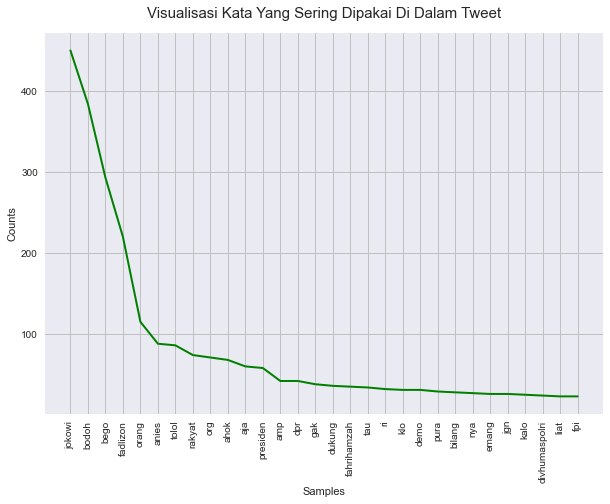

In [46]:
# Membuat visualisasi tweet berdasarkan isi tweet yang sering muncul sebanyak 30 kata yang sering digunakan
from cycler import cycler

plt.figure(figsize=(10, 7))
plt.title("Visualisasi Kata Yang Sering Dipakai Di Dalam Tweet", fontdict={"fontsize":15}, pad=15)
plt.rc("axes", prop_cycle=(cycler("color", ["g"])))
fqdist_content.plot(30, cumulative=False)
plt.show()

## 4. Visualisasi Dengan Wordclouds

### Semua Label (Positif & Negatif)

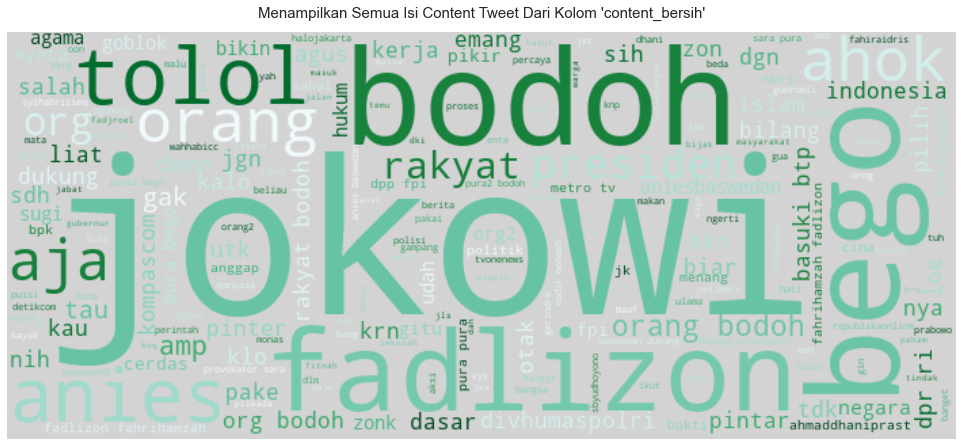

In [21]:
# Menampilkan sekaligus memvisualisasikan kata menggunakan wordcloud dari DataFrame "data_2016" dari kolom "content_bersih"  
all_tweet_post = " ".join(word for word in data_2016["content_bersih"])
wordcloud = WordCloud(colormap="BuGn", width=700, height=300, 
                      mode="RGBA", background_color="lightgrey").generate(all_tweet_post)
plt.figure(figsize=(17,10))
plt.title("Menampilkan Semua Isi Content Tweet Dari Kolom 'content_bersih'", fontdict={"fontsize":15}, pad = 15);
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Jika dilihat dari visualisasi diatas tampilan tersebut merupakan visualisasi dari wordcloud yang bertujuan untuk mendapatkan insight pemahaman secara utuh tentang suatu ide atau gagasan dari seseorang atau tulisan seseorang dalam suatu waktu tertentu. Visualsasi ini banyak sekali digunakan dalam pengujian analisa sentimen karena untuk melihat setiap kata-kata yang telah diketikkan oleh masyarakat.

Namun tampilan visualisasi diatas masih mencakup semua label (positif & negatif) yang membuat kita kesulitan untuk mengetahui kata-kata mana yang bernilai positif/negatif. Maka dari itu kami akan membuatnya secara terpisah antara visualisasi wordcloud yang bernilai positif dan wordcloud yang bernilai negatif.

### Label Positif

In [22]:
# Memisahkan semua data yang memiliki label positif yang disesuaikan dari kolom "label"
data_2016_label_positif = data_2016[data_2016.label == "positif"]
data_2016_label_positif.head()

,tanggal,content,label,content_tokenizing,content_stopwords,content_stemming,content_bersih
1,2016-12-19 19:20:46+00:00,kaskus apa anies itu dipikir bego ahok jauh l...,positif,"[kaskus, apa, anies, itu, dipikir, bego, ahok,...","[kaskus, anies, dipikir, bego, ahok, loe, hok]","[kaskus, anies, pikir, bego, ahok, loe, hok]",kaskus anies pikir bego ahok loe hok
3,2016-11-24 21:22:09+00:00,bego bngt asu anies sandi uno itu pantes aja d...,positif,"[bego, bngt, asu, anies, sandi, uno, itu, pant...","[bego, bngt, asu, anies, sandi, uno, pantes, a...","[bego, bngt, asu, anies, sandi, uno, pantes, a...",bego bngt asu anies sandi uno pantes aja pecat...
5,2016-11-13 17:45:54+00:00,percetakanku iwanfals kalo polling anies mena...,positif,"[percetakanku, iwanfals, kalo, polling, anies,...","[percetakanku, iwanfals, kalo, polling, anies,...","[cetak, iwanfals, kalo, polling, anies, menang...",cetak iwanfals kalo polling anies menang iwan ...
6,2016-10-29 17:42:11+00:00,anies akan masukan dana csr apbd anis bego itu...,positif,"[anies, akan, masukan, dana, csr, apbd, anis, ...","[anies, masukan, dana, csr, apbd, anis, bego, ...","[anies, masuk, dana, csr, apbd, anis, bego, da...",anies masuk dana csr apbd anis bego dana swast...
7,2016-10-29 17:40:58+00:00,anies akan masukan dana csr apbd anis bego itu...,positif,"[anies, akan, masukan, dana, csr, apbd, anis, ...","[anies, masukan, dana, csr, apbd, anis, bego, ...","[anies, masuk, dana, csr, apbd, anis, bego, da...",anies masuk dana csr apbd anis bego dana swast...


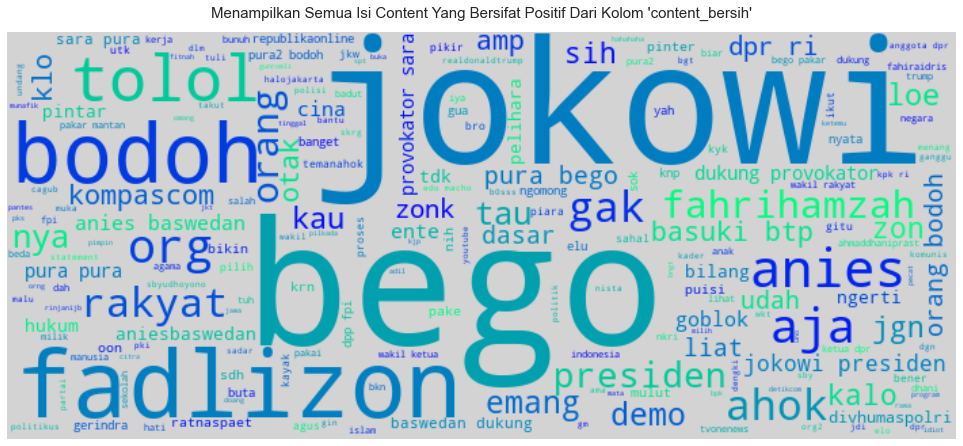

In [23]:
# Memvisualisasikan menggunakan wordcloud dari DataFrame "data_2016_label_positif" dari kolom "content_bersih"  
all_content_positive = " ".join(word for word in data_2016_label_positif["content_bersih"])
wordcloud = WordCloud(colormap="winter", width=700, height=300, 
                      mode="RGBA", background_color="lightgrey").generate(all_content_positive)
plt.figure(figsize=(17,10))
plt.title("Menampilkan Semua Isi Content Yang Bersifat Positif Dari Kolom 'content_bersih'", 
          fontdict={"fontsize":15}, pad = 15);
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### Label Negatif

In [24]:
# Memisahkan semua data yang memiliki label negatif yang disesuaikan dari kolom "label"
data_2016_label_negatif = data_2016[data_2016.label == "negatif"]
data_2016_label_negatif.head()

,tanggal,content,label,content_tokenizing,content_stopwords,content_stemming,content_bersih
0,2016-12-21 04:36:51+00:00,jakartans bego mending kalo anies ini agus htt...,negatif,"[jakartans, bego, mending, kalo, anies, ini, a...","[jakartans, bego, mending, kalo, anies, agus, ...","[jakartans, bego, mending, kalo, anies, agus, ...",jakartans bego mending kalo anies agus c66jtx7qoz
2,2016-12-09 11:21:17+00:00,mau debatnya klo bertempat petamburan kali klo...,negatif,"[mau, debatnya, klo, bertempat, petamburan, ka...","[debatnya, klo, bertempat, petamburan, kali, k...","[debat, klo, tempat, tambur, kali, klo, kalah,...",debat klo tempat tambur kali klo kalah debat k...
4,2016-11-18 17:40:30+00:00,sam arif kalo orang tidak bego dan tidak tol...,negatif,"[sam, arif, kalo, orang, tidak, bego, dan, tid...","[sam, arif, kalo, orang, bego, tolol, milih, a...","[sam, arif, kalo, orang, bego, tolol, milih, a...",sam arif kalo orang bego tolol milih ahy anies
12,2016-10-09 09:38:35+00:00,anies bener naik angkutan umum jkt itu mahal k...,negatif,"[anies, bener, naik, angkutan, umum, jkt, itu,...","[anies, bener, angkutan, jkt, mahal, kalo, tau...","[anies, bener, angkut, jkt, mahal, kalo, tau, ...",anies bener angkut jkt mahal kalo tau bego aja...
20,2016-12-29 10:04:37+00:00,takviri gunromli hanya orng bodoh yang percay...,negatif,"[takviri, gunromli, hanya, orng, bodoh, yang, ...","[takviri, gunromli, orng, bodoh, percaya, agus...","[takviri, gunromli, orng, bodoh, percaya, agus...",takviri gunromli orng bodoh percaya agus pimpi...


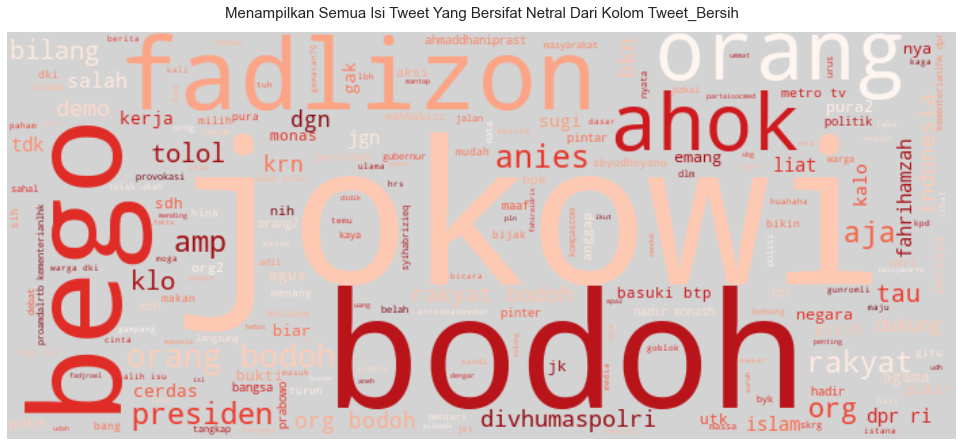

In [25]:
# Membuat Tampilan Visualisasi menggunakan wordcloud dari DataFrame "data_2016_label_negatif" dari kolom "content_bersih" 
all_content_negative = " ".join(word for word in data_2016_label_negatif["content_bersih"])
wordcloud = WordCloud(colormap="Reds", width=700, height=300, 
                      mode="RGBA", background_color="lightgrey").generate(all_content_negative)
plt.figure(figsize=(17,10))
plt.title("Menampilkan Semua Isi Tweet Yang Bersifat Netral Dari Kolom Tweet_Bersih", 
          fontdict={"fontsize":15}, pad = 15);
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## 5. Melakukan Pemodelan Dengan Model Machine Learning 

In [26]:
# Menampilkan keseluruhan data dari DataFrame "data_2016"
data_2016.head()

,tanggal,content,label,content_tokenizing,content_stopwords,content_stemming,content_bersih
0,2016-12-21 04:36:51+00:00,jakartans bego mending kalo anies ini agus htt...,negatif,"[jakartans, bego, mending, kalo, anies, ini, a...","[jakartans, bego, mending, kalo, anies, agus, ...","[jakartans, bego, mending, kalo, anies, agus, ...",jakartans bego mending kalo anies agus c66jtx7qoz
1,2016-12-19 19:20:46+00:00,kaskus apa anies itu dipikir bego ahok jauh l...,positif,"[kaskus, apa, anies, itu, dipikir, bego, ahok,...","[kaskus, anies, dipikir, bego, ahok, loe, hok]","[kaskus, anies, pikir, bego, ahok, loe, hok]",kaskus anies pikir bego ahok loe hok
2,2016-12-09 11:21:17+00:00,mau debatnya klo bertempat petamburan kali klo...,negatif,"[mau, debatnya, klo, bertempat, petamburan, ka...","[debatnya, klo, bertempat, petamburan, kali, k...","[debat, klo, tempat, tambur, kali, klo, kalah,...",debat klo tempat tambur kali klo kalah debat k...
3,2016-11-24 21:22:09+00:00,bego bngt asu anies sandi uno itu pantes aja d...,positif,"[bego, bngt, asu, anies, sandi, uno, itu, pant...","[bego, bngt, asu, anies, sandi, uno, pantes, a...","[bego, bngt, asu, anies, sandi, uno, pantes, a...",bego bngt asu anies sandi uno pantes aja pecat...
4,2016-11-18 17:40:30+00:00,sam arif kalo orang tidak bego dan tidak tol...,negatif,"[sam, arif, kalo, orang, tidak, bego, dan, tid...","[sam, arif, kalo, orang, bego, tolol, milih, a...","[sam, arif, kalo, orang, bego, tolol, milih, a...",sam arif kalo orang bego tolol milih ahy anies


Karena pada pengujian kali ini data yang bersifat lebih dominan terhadap data dokumen maka kami akan menggunakan sebuah pembobotan nilai yang bernama TF-IDF (term frequency-inverse document frequency). Pembobotan dengan TF-IDF  merupakan salah satu faktor pembobotan yang sering digunakan dalam konteks penambangan data yang bersifat full text. Selain itu TF-IDF juga dapat dapat digunakan untuk menganalisa hubungan antara sebuah frase/kalimat dengan sekumpulan dokumen. Teknik ini akan melakukan perhitungan dari sebuah kata kunci terhadap masing-masing dokumen.

In [27]:
# Melakukan proses pembobotan nilai dengan TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
data_2016_tfidf = tfidf.fit_transform(data_2016["content_bersih"].astype("U"))
data_2016_tfidf

<695x2925 sparse matrix of type '<class 'numpy.float64'>'
	with 8094 stored elements in Compressed Sparse Row format>

In [28]:
# Melakukan pembagian data menjadi 2 bagian (data train & data test) menggunakan train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_2016_tfidf, data_2016["label"], test_size=0.2, random_state=20)

Penjelasan dari proses pemisahan data menjadi 2 variabel dan fungsi train_test_split:

1. data_2016_tfidf: merupakan sebuah fungsi yang berisi nilai pembobotan dari kolom "content_bersih"
2. data_2016: merupakan sebuah fungsi untuk mendeklarasikan/memanggil kolom "label" dari masing-masing nilai sentimen
3. test_size: Nilai presentase dari sebuah ukuran untuk membagi data test. Dalam pengujian ini saya memakai nilai test_size = 0.3 yang dimana ukuran dari data test mencapai 30% dan data train mencapai 70%.
4. random_state: Menetapkan nilai. Jika nilainya sama maka fungsi train_test_split akan menghasilkan pemisahan nilai yang sama persis di setiap waktunya. Namun jika ditentukan nilai random_statenya maka data akan diacak (random).

Setelah melakukan proses split yaitu membagi keutuhan data menjadi 2 bagian (data test & data train) langkah selanjutnya adalah melakukan pemodelan dengan menggunakan model multinomial naive bayes atau yang biasa dikenal sebagai MultinomialNB. Multinomial naive bayes merupakan sebuah teknik turunan dari naive bayes yang menggunakan teknik yang bernama conditional probability yaitu sebuah teknik yang dapat dilakukan dengan menggunakan frekuensi kemunculan suatu kata pada suatu kelas.

In [29]:
# Pemanggilan model Multinomial Naive Bayes (MultinomialNB) beserta parameternya
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

model_mnb_train = MultinomialNB()

parameters = {
    "alpha": [6.5],
    "fit_prior": [False]
    
}

grid_search_mnb_train = GridSearchCV(model_mnb_train, parameters, cv=25) # CV = Cross Validation

grid_search_mnb_train.fit(x_train, y_train)

GridSearchCV(cv=25, estimator=MultinomialNB(),
             param_grid={'alpha': [6.5], 'fit_prior': [False]})

Penjelasan dari poin-poin yang ada di codingan diatas:
1. Parameters merupakan sebuah teknik pemanggilan fungsi-fungsi yang menjadi bagian dari sebuah model itu sendiri. Untuk mengecek parameter dari setiap model bisa dicek pada website sckit-learn. Pada codingan diatas, fungsi alpha dan fit_prior merupakan bagian dari parameter MultinomialNB. 
2. GridSearchCV merupakan sebuah teknik untuk mencari best paramater/parameter terbaik untuk kasus klasifikasi. Pada codingan diatas, teknik GridSearchCV saya gunakan untuk memanggil variabel model dari MultinomialNB (model_mnb), fungsi serta nilai dari paramater model MultinomialNB, dan fungsi cross validation yang bernilai 30.
3. Cross Validation merupakan sebuah metode yang biasa dipakai dalam pengujian data mining yang bertujuan untuk memperoleh hasil akhir yang optimal. Metode ini akan menilai dengan cara mengestimasi rotasi yang hasil statistik analisisnya akan menggeneralisasi kumpulan data yang bersifat independen.
4. .fit merupakan sebuah fungsi yang bertujuan untuk melatih model dengan data training.

Namun setelah melakukan proses pemodelan untuk data train, saya juga akan melakukan pemodelan untuk data latih (test) supaya hasil akurasi yang di dapatkan tidak mengalami overfitting.

In [30]:
"""
Karena pada langkah sebelumnya sudah melakukan pemanggilan model Multinomial Naive Bayes terhadap data train (latih) selanjutnya
adalah melakukan pemanggilan model Multinomial Naive Bayes untuk data latih
"""
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

model_mnb_test = MultinomialNB()

parameters = {
    "alpha": [6.5],
    "fit_prior": [False]
}

grid_search_mnb_test = GridSearchCV(model_mnb_test, parameters, cv=30) # CV = Cross Validation

grid_search_mnb_test.fit(x_test, y_test) # Melatih model MultinomialNB dengan data test supaya tidak terjadi imbalanced

GridSearchCV(cv=30, estimator=MultinomialNB(),
             param_grid={'alpha': [6.5], 'fit_prior': [False]})

In [31]:
# Melakukan pengujian untuk variabel test & varibael train
print("----------------------------Prediksi Dari Data Uji---------------------------------")
prediction_test = grid_search_mnb_train.predict(x_test)
print(prediction_test)

print()

print("--------------------------Prediksi Dari Data Latih----------------------------------")
prediction_train = grid_search_mnb_test.predict(x_train)
print(prediction_train)

----------------------------Prediksi Dari Data Uji---------------------------------
['positif' 'positif' 'positif' 'positif' 'negatif' 'negatif' 'positif'
 'negatif' 'negatif' 'negatif' 'negatif' 'negatif' 'negatif' 'positif'
 'positif' 'negatif' 'positif' 'negatif' 'positif' 'positif' 'positif'
 'negatif' 'positif' 'positif' 'negatif' 'negatif' 'positif' 'negatif'
 'negatif' 'positif' 'negatif' 'positif' 'positif' 'negatif' 'negatif'
 'negatif' 'positif' 'negatif' 'negatif' 'positif' 'negatif' 'negatif'
 'negatif' 'negatif' 'negatif' 'negatif' 'negatif' 'negatif' 'positif'
 'negatif' 'negatif' 'negatif' 'positif' 'negatif' 'negatif' 'positif'
 'negatif' 'positif' 'negatif' 'negatif' 'negatif' 'positif' 'negatif'
 'positif' 'positif' 'positif' 'negatif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'negatif' 'positif' 'negatif' 'negatif'
 'positif' 'negatif' 'negatif' 'positif' 'negatif' 'positif' 'positif'
 'negatif' 'positif' 'negatif' 'positif' 'positif' 'positif' 'ne

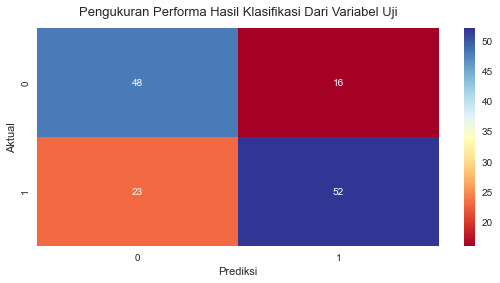

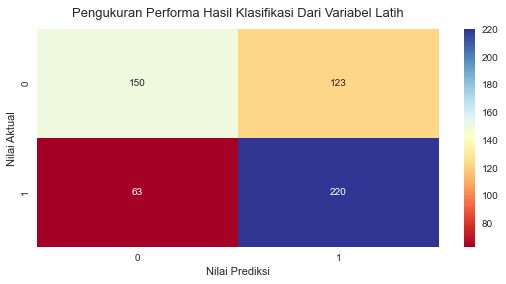

In [32]:
# Membuat visualisasi untuk menampilkan pengukuran performa dari hasil prediksi pada variabel uji & latih

f, ax = plt.subplots(figsize=(9, 4))
sns.heatmap(confusion_matrix(y_test, prediction_test), annot=True, cmap="RdYlBu", fmt=".0f", ax=ax)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Pengukuran Performa Hasil Klasifikasi Dari Variabel Uji", fontdict={"fontsize":13}, pad=13)
plt.show()

f, ax = plt.subplots(figsize=(9, 4))
sns.heatmap(confusion_matrix(y_train, prediction_train), annot=True, cmap="RdYlBu", fmt=".0f", ax=ax)
plt.xlabel("Nilai Prediksi")
plt.ylabel("Nilai Aktual")
plt.title("Pengukuran Performa Hasil Klasifikasi Dari Variabel Latih", fontdict={"fontsize":13}, pad=13)
plt.show()

Penjelasan dari visualisasi pada confusion matrix:
- Data Test
1. True Positive pada data test memiliki nilai sejumlah 48. True Positive merupakan data yang bernilai positif yang diprediksi tepat.
2. True Negative pada data test memiliki nilai sejumlah 52. True Negative sendiri merupakan data yang bernilai negatif yang diprediksi secara tepat.
3. False Positive pada data test memiliki nilai sejumlah 16. False Positive sendiri merupakan data yang bernilai negatif namun pada saat diprediksi terhitung sebagai data positif.
4. False Negative pada data test memiliki nilai sejumlah 23. False Negative sendiri merupakan data yang bernilai positif namun pada saat diprediksi terhitung sebagai data yang negatif.

- Data Train
1. True Positive pada data train memiliki nilai sejumlah 150. True Positive merupakan data yang bernilai positif yang diprediksi tepat.
2. True Negative pada data train memiliki nilai sejumlah 221. True Negative sendiri merupakan data yang bernilai negatif yang diprediksi secara tepat.
3. False Positive pada data train memiliki nilai sejumlah 123. False Positive sendiri merupakan data yang bernilai negatif namun pada saat diprediksi terhitung sebagai data positif.
4. False Negative pada data train memiliki nilai sejumlah 62. False Negative sendiri merupakan data yang bernilai positif namun pada saat diprediksi terhitung sebagai data yang negatif.

In [33]:
# Menampilkan tingkat akurasi, precision, recall & f1-score dari model Multonimial Naive Bayes

print("------------------------Prediksi Dari Variabel Uji-------------------------------")
cr_test = classification_report(y_test, prediction_test)
print(cr_test)

print("------------------------Prediksi Dari Variabel Latih-------------------------------")
cr_train = classification_report(y_train, prediction_train)
print(cr_train)

------------------------Prediksi Dari Variabel Uji-------------------------------
              precision    recall  f1-score   support

     negatif       0.68      0.75      0.71        64
     positif       0.76      0.69      0.73        75

    accuracy                           0.72       139
   macro avg       0.72      0.72      0.72       139
weighted avg       0.72      0.72      0.72       139

------------------------Prediksi Dari Variabel Latih-------------------------------
              precision    recall  f1-score   support

     negatif       0.70      0.55      0.62       273
     positif       0.64      0.78      0.70       283

    accuracy                           0.67       556
   macro avg       0.67      0.66      0.66       556
weighted avg       0.67      0.67      0.66       556



## 6. Membuat Prediksi Akhir & Visualisasi Tahap Akhir

In [34]:
# Membuat variabel baru yang dihasilkan dari prediksi label content sentimen pada data test
content_output_test = pd.DataFrame({"label": prediction_test})
content_output_test.head()

,label
0,positif
1,positif
2,positif
3,positif
4,negatif


In [35]:
# Membuat variabel yang dihasilkan dari prediksi label content sentimen pada data train
content_output_train = pd.DataFrame({"label": prediction_train})
content_output_train.head()

,label
0,negatif
1,positif
2,positif
3,negatif
4,negatif


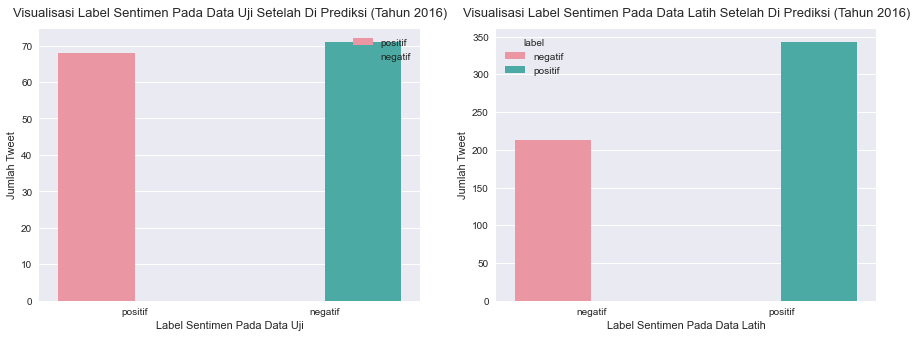

In [36]:
# Visualisasi untuk melihat sekaligus membandingkan hasil sentimen dari data test & data train
plt.figure(figsize=(15, 5))

# Visualiasi dari hasil prediksi pada variabel test/uji
plt.subplot(1, 2, 1)
sns.countplot(x="label", hue="label", data=content_output_test)
plt.title("Visualisasi Label Sentimen Pada Data Uji Setelah Di Prediksi (Tahun 2016)", fontdict={"fontsize":13}, pad=13)
plt.xlabel("Label Sentimen Pada Data Uji")
plt.ylabel("Jumlah Tweet")
plt.legend()

# Visualiasi dari hasil prediksi pada variabel train/latih
plt.subplot(1, 2, 2)
sns.countplot(x="label", hue="label", data=content_output_train)
plt.title("Visualisasi Label Sentimen Pada Data Latih Setelah Di Prediksi (Tahun 2016)", fontdict={"fontsize":13}, pad=13)
plt.xlabel("Label Sentimen Pada Data Latih")
plt.ylabel("Jumlah Tweet")
plt.show()

Penjelasan dari bar plot sebagai berikut:
- Variabel content_output_test
1. Pada variabel content_output_test dengan nilai label "positif" memiliki jumlah akhir isi content tweet sebanyak 68. Sedangkan pada nilai label "negatif" di variabel content_output_test memiliki jumlah nilai isi content tweet sebanyak 71. Jadi dapat disimpulkan bahwasanya jumlah akhir setelah dilakukan klasifikasi nilai label "negatif" lebih banyak daripada nilai label "positif" walaupun hanya memiliki selisih nilai yaitu 3.

- Variabel content_ouutput_train
1. Pada variabel content_output_train dengan nilai label "positif" memiliki jumlah akhir isi content tweet sebanyak 343. Sedangkan pada nilai label "negatif" di variabel content_output_train memiliki jumlah nilai isi content tweet sebanyak 213. Jadi dapat disimpulkan bahwasanya jumlah akhir setelah dilakukan klasifikasi nilai label "positif" lebih banyak daripada nilai label "negatif" yang memiliki selisih nilai sebanyak 130 nilai.